In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from registration_utilities import *
from metadata import *
from data_manager import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for AWS compute node


No vtk


In [2]:
stack_fixed = 'MD661'
stack_moving = 'atlasV4'

warp_setting = 16
detector_id = 1

# Global Transform

In [3]:
warp_setting = 16
trial_idx = None

In [5]:
warp_properties = registration_settings.loc[warp_setting]

upstream_warp_setting = warp_properties['upstream_warp_id']
if upstream_warp_setting == 'None':
    upstream_warp_setting = None
else:
    upstream_warp_setting = int(upstream_warp_setting)

In [4]:
# Load transform parameters

global_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
DataManager.load_alignment_parameters(stack_m=stack_moving, stack_f=stack_fixed,
                                      prep_id_f=2,
                                      detector_id_f=detector_id,
                                      warp_setting=warp_setting)

rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_warp16_MD661_prep2_detector1_down32_scoreVolume/atlasV4_down32_scoreVolume_warp16_MD661_prep2_detector1_down32_scoreVolume_parameters.txt" && mkdir -p "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_warp16_MD661_prep2_detector1_down32_scoreVolume"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_warp16_MD661_prep2_detector1_down32_scoreVolume/atlasV4_down32_scoreVolume_warp16_MD661_prep2_detector1_down32_scoreVolume_parameters.txt" "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_warp16_MD661_prep2_detector1_down32_scoreVolume/atlasV4_down32_scoreVolume_warp16_MD661_prep2_detector1_down32_scoreVolume_parameters.txt"


## Parallel

In [8]:
def transform_volume_one_structure(structure):
    try:
        t = time.time()

        vol_m = DataManager.load_original_volume(stack=stack_moving, structure=structure, downscale=32)

        volume_m_alignedTo_f = \
        transform_volume(vol=vol_m, global_params=global_params, centroid_m=centroid_m, centroid_f=centroid_f,
                          xdim_f=xdim_f, ydim_f=ydim_f, zdim_f=zdim_f)

        volume_m_alignedTo_f_fp = \
        DataManager.get_transformed_volume_filepath(stack_m=stack_moving,
                                                    stack_f=stack_fixed,
                                                    detector_id_f=detector_id,
                                                    warp_setting=warp_setting,
                                                    structure=structure,
                                                   trial_idx=None)

        create_parent_dir_if_not_exists(volume_m_alignedTo_f_fp)
        bp.pack_ndarray_file(volume_m_alignedTo_f, volume_m_alignedTo_f_fp)
        upload_to_s3(volume_m_alignedTo_f_fp)
    
        sys.stderr.write('Transform: %.2f seconds.\n' % (time.time() - t)) # 3s
    
    except Exception as e:
        sys.stderr.write('Error transforming volume %s: %s.\n' % (structure, e))

In [9]:
t = time.time()

pool = Pool(NUM_CORES)
pool.map(transform_volume_one_structure, all_known_structures_sided_with_surround)
pool.close()
pool.join()

sys.stderr.write('Transform all structures: %.2f seconds.\n' % (time.time() - t)) #

aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_10N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_10N_L.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_4N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_4N_L.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down3

Transform: 4.21 seconds.
Transform: 4.23 seconds.
Transform: 4.23 seconds.
Transform: 4.25 seconds.
Transform: 4.27 seconds.
Transform: 4.29 seconds.
Transform: 4.30 seconds.
Transform: 4.30 seconds.
Transform: 4.32 seconds.
Transform: 4.29 seconds.
Transform: 4.32 seconds.
Transform: 4.33 seconds.
Transform: 4.34 seconds.
Transform: 4.36 seconds.
Transform: 4.37 seconds.
Transform: 4.38 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_4N_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_4N_L_surround_200.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_4N_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_4N_R_surround_200.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlas

Transform: 4.12 seconds.
Transform: 4.16 seconds.
Transform: 4.19 seconds.
Transform: 4.19 seconds.
Transform: 4.15 seconds.
Transform: 4.17 seconds.
Transform: 4.20 seconds.
Transform: 4.19 seconds.
Transform: 4.26 seconds.
Transform: 4.22 seconds.
Transform: 4.19 seconds.
Transform: 4.23 seconds.
Transform: 4.24 seconds.
Transform: 4.21 seconds.
Transform: 4.31 seconds.
Transform: 4.46 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Amb_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Amb_L.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Amb_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Amb_R.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_dow

Transform: 4.12 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_RtTg.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_RtTg.bp"


Transform: 4.15 seconds.
Transform: 4.22 seconds.
Transform: 4.11 seconds.
Transform: 4.17 seconds.
Transform: 4.29 seconds.
Transform: 4.29 seconds.
Transform: 4.31 seconds.
Transform: 4.18 seconds.
Transform: 4.26 seconds.
Transform: 4.31 seconds.
Transform: 4.31 seconds.
Transform: 4.48 seconds.
Transform: 4.51 seconds.
Transform: 4.41 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_IC.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_IC.bp"


Transform: 6.21 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Amb_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Amb_R_surround_200.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Amb_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Amb_L_surround_200.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/a

Transform: 3.99 seconds.
Transform: 4.08 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_RtTg_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_RtTg_surround_200.bp"


Transform: 4.16 seconds.
Transform: 4.12 seconds.
Transform: 4.18 seconds.
Transform: 4.23 seconds.
Transform: 4.24 seconds.
Transform: 4.21 seconds.
Transform: 4.18 seconds.
Transform: 4.31 seconds.
Transform: 4.23 seconds.
Transform: 4.15 seconds.
Transform: 4.33 seconds.
Transform: 4.20 seconds.
Transform: 4.20 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_IC_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_IC_surround_200.bp"


Transform: 4.61 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SNC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SNC_L.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SNC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SNC_R.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_dow

Transform: 4.13 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Sp5C_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Sp5C_L.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_VCA_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_VCA_R.bp"


Transform: 4.24 seconds.
Transform: 4.20 seconds.
Transform: 4.06 seconds.
Transform: 4.49 seconds.
Transform: 4.41 seconds.
Transform: 4.37 seconds.
Transform: 4.15 seconds.
Transform: 4.38 seconds.
Transform: 4.28 seconds.
Transform: 4.21 seconds.
Transform: 4.47 seconds.
Transform: 4.53 seconds.
Transform: 4.14 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_VCP_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_VCP_L.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SC.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SC.bp"


Transform: 4.04 seconds.
Transform: 7.29 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SNC_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SNC_L_surround_200.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SNC_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SNC_R_surround_200.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/a

Transform: 4.24 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Sp5O_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Sp5O_R_surround_200.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SNR_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SNR_R_surround_200.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes

Transform: 4.13 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Sp5C_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_Sp5C_L_surround_200.bp"


Transform: 4.05 seconds.
Transform: 3.97 seconds.


rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour.bp" && mkdir -p "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour.bp" "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour.bp"


Transform: 4.13 seconds.


rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5.bp" && mkdir -p "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5.bp" "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5.bp"


Transform: 4.17 seconds.
Transform: 4.22 seconds.
Transform: 4.26 seconds.
Transform: 4.24 seconds.
Transform: 4.14 seconds.
Transform: 4.27 seconds.
Transform: 4.39 seconds.
Transform: 4.33 seconds.
File does not exist: /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour.bp
Error transforming volume outerContour: [Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour.bp'.


rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp" && mkdir -p "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp" "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp"


File does not exist: /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5.bp
Error transforming volume sp5: [Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5.bp'.


rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp" && mkdir -p "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes"


Transform: 4.46 seconds.


aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp" "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_VCP_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_VCP_L_surround_200.bp"


File does not exist: /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp
Error transforming volume outerContour_surround_200: [Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp'.
File does not exist: /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp
Error transforming volume sp5_surround_200: [Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp'.
Transform: 3.35 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SC_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_SC_surround_200.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_VCP_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_VCP_R.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16

Transform: 3.83 seconds.
Transform: 2.88 seconds.
Transform: 2.79 seconds.
Transform: 2.94 seconds.


aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_VCP_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_VCP_R_surround_200.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_VLL_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_VLL_R_surround_200.bp"
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/a

Transform: 2.70 seconds.
Transform: 2.67 seconds.
Transform: 2.69 seconds.
Transform all structures: 30.99 seconds.


# Read

In [6]:
warp_setting = 1
trial_idx = 0

In [7]:
# Read transformed volumes

structure = '7N_L'

warped_volume = DataManager.load_transformed_volume(stack_m=stack_moving, 
                                                                          stack_f=stack_fixed, 
                                    classifier_setting_m=classifier_setting,
                                    classifier_setting_f=classifier_setting,
                                    warp_setting=warp_setting,
                                    trial_idx=0, structure=structure)

In [ ]:
display_volume_sections(warped_volume)

# Structure-wise Transform

In [17]:
classifier_setting = 30
warp_setting = 5
trial_idx = 0

In [18]:
warp_properties = registration_settings.loc[warp_setting]
print warp_properties

upstream_warp_setting = warp_properties['upstream_warp_id']
if upstream_warp_setting == 'None':
    upstream_warp_setting = None
else:
    upstream_warp_setting = int(upstream_warp_setting)
    upstream_trial_idx = 1 # modify this for different upstream warp

upstream_warp_id                        1
transform_type                      rigid
terminate_thresh                    1e-06
grad_computation_sample_number     100000
grid_search_sample_number           10000
std_tx                                100
std_ty                                100
std_tz                                100
std_theta_xy                           30
surround_weight                   inverse
regularization_weight                   0
Name: 5, dtype: object


In [19]:
# if warp_setting == 1:
#     upstream_warp_setting = None
# elif warp_setting == 2:
#     upstream_warp_setting = 1
# elif warp_setting == 4:
#     upstream_warp_setting = 1
# elif warp_setting == 5:
#     upstream_warp_setting = 1
# else:
#     raise Exception('Warp setting not recognized.')

In [20]:
# for structure in all_known_structures_sided:
for structure in ['IC']:

    # Load local transform parameters
    
    try:

        t = time.time()
        
        local_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
        DataManager.load_alignment_parameters(stack_m=stack_moving, stack_f=stack_fixed,
                                              classifier_setting_m=classifier_setting,
                                              classifier_setting_f=classifier_setting,
                                              warp_setting=warp_setting,
                                              param_suffix=structure,
                                              trial_idx=trial_idx)

        # Read global tx
        global_transformed_moving_structure_vol = \
        DataManager.load_transformed_volume(stack_m=stack_moving, stack_f=stack_fixed,
                                            classifier_setting_m=classifier_setting,
                                            classifier_setting_f=classifier_setting,
                                            warp_setting=upstream_warp_setting, 
                                            trial_idx=upstream_trial_idx,
                                            structure=structure)

        # Transform
        local_transformed_moving_structure_vol = transform_volume(vol=global_transformed_moving_structure_vol, 
                                                 global_params=local_params, 
                                                 centroid_m=centroid_m, centroid_f=centroid_f,
                                                 xdim_f=xdim_f, ydim_f=ydim_f, zdim_f=zdim_f)

        # Save
        local_transformed_moving_structure_fn = \
        DataManager.get_transformed_volume_filepath(stack_m=stack_moving, stack_f=stack_fixed,
                                                    classifier_setting_m=classifier_setting,
                                                    classifier_setting_f=classifier_setting,
                                                    warp_setting=warp_setting,
                                                    trial_idx=trial_idx,
                                                    structure=structure)

        create_parent_dir_if_not_exists(local_transformed_moving_structure_fn)
        bp.pack_ndarray_file(local_transformed_moving_structure_vol, local_transformed_moving_structure_fn)
        
        upload_from_ec2_to_s3(local_transformed_moving_structure_fn)
        
        sys.stderr.write('Transform: %.2f seconds.\n' % (time.time() - t))
        
    except Exception as e:
        sys.stderr.write('%s\n' % e)
        sys.stderr.write('Error transforming volume %s.\n' % structure)

aws s3 cp /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_5_MD657_down32_scoreVolume_clf_30_trial_0/score_volumes/atlasV3_down32_scoreVolume_clf_30_warp_5_MD657_down32_scoreVolume_clf_30_trial_0_IC.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_5_MD657_down32_scoreVolume_clf_30_trial_0/score_volumes/atlasV3_down32_scoreVolume_clf_30_warp_5_MD657_down32_scoreVolume_clf_30_trial_0_IC.bp


Child returned 0
0.46 seconds.
Transform: 5.00 seconds.


# Polyrigid (Weighted Average) Transform

In [3]:
registration_settings = read_csv(REGISTRATION_SETTINGS_CSV, header=0, index_col=0)
registration_settings

,upstream_warp_id,transform_type,terminate_thresh,grad_computation_sample_number,grid_search_sample_number,std_tx_um,std_ty_um,std_tz_um,std_theta_xy_degree,surround_weight,regularization_weight,comment
warp_id,,,,,,,,,,,,
1,None,affine,0.000010,100000.0,1000.0,2000,2000,2000,30,0,NaN,NaN
2,1,rigid,0.000010,100000.0,10000.0,100,100,100,30,0,NaN,NaN
4,1,rigid,0.000001,100000.0,10000.0,100,100,100,10,0,0.000001,NaN
5,1,rigid,0.000001,100000.0,10000.0,100,100,100,30,inverse,0.000000,NaN
6,1,affine,0.000010,100000.0,10000.0,100,100,100,30,-0.5,0.000000,NaN
7,None,rigid,0.000001,100000.0,1000.0,50,50,50,10,0,NaN,NaN
8,None,rigid,0.000001,100000.0,10000.0,200,200,200,30,inverse,0.000000,align mid-sagittal planes
9,8,rigid,0.000001,100000.0,10000.0,200,200,200,30,NaN,NaN,global registration given mid-sagittal planes ...
18,8,affine,0.000001,100000.0,10000.0,200,200,200,30,NaN,NaN,global registration given mid-sagittal planes ...


In [165]:
stack_fixed = 'MD658'
stack_moving = 'atlasV4'

In [166]:
warp_setting = 19

In [167]:
warp_properties = registration_settings.loc[warp_setting]

upstream_warp_setting = warp_properties['upstream_warp_id']
if upstream_warp_setting == 'None':
    upstream_warp_setting = None
else:
    upstream_warp_setting = int(upstream_warp_setting)

In [168]:
detector_id = 1

In [169]:
globally_registered_volume = \
DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, stack_f=stack_fixed,
                                                         warp_setting=upstream_warp_setting,
                                                         prep_id_f=2,
                                                        detector_id_f=detector_id)

Prior structure/index map not found. Generating a new one.


rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_5N_L.bp" && mkdir -p "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_5N_L.bp" "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_5N_L.bp"
rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_5N_R.bp" && mkdir -p "/

rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_LC_R.bp" && mkdir -p "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_LC_R.bp" "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_LC_R.bp"
rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_LRt_L.bp" && mkdir -p "

rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_SNC_L.bp" && mkdir -p "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_SNC_L.bp" "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_SNC_L.bp"
rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_SNC_R.bp" && mkdir -

rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_Sp5O_R.bp" && mkdir -p "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_Sp5O_R.bp" "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_Sp5O_R.bp"
rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_Sp5C_L.bp" && mkd

rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_DC_L.bp" && mkdir -p "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_DC_L.bp" "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_DC_L.bp"
rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_DC_R.bp" && mkdir -p "/

File does not exist: /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_sp5.bp
[Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_sp5.bp'
Score volume for sp5 does not exist.


rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_outerContour.bp" && mkdir -p "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_outerContour.bp" "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_outerContour.bp"


File does not exist: /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_outerContour.bp
[Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_outerContour.bp'
Score volume for outerContour does not exist.


rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_SC.bp" && mkdir -p "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_SC.bp" "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_SC.bp"
rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD658_prep2_detector1_down32_scoreVolume_IC.bp" && mkdir -p "/shared/C

In [170]:
structure_sizes = {k: np.count_nonzero(v) for k, v in globally_registered_volume.iteritems()}
total_size = sum(structure_sizes.values())
structure_sizes_percent = {s: float(size)/total_size for s, size in structure_sizes.iteritems()}
# each structure's size as a percetage of all structures' size.

In [171]:
structure_covars = {}
for s, v in globally_registered_volume.iteritems():
    ys, xs, zs = np.where(v)
    nzs = np.c_[xs, ys, zs]
    nzsc = nzs - nzs.mean(axis=0)
    C = np.dot(nzsc.T, nzsc)/float(len(nzsc))
    S, V = np.linalg.eigh(C)
    structure_covars[s] = C

In [172]:
# Read Transform of each structure, do polyrigid transform

rigid_parameters = {}
anchor_points = {}

for structure in all_known_structures_sided:

    try:
        tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
        DataManager.load_alignment_parameters(stack_m=stack_moving, stack_f=stack_fixed,
                                              detector_id_f=detector_id, prep_id_f=2,
                                              warp_setting=17,
                                             structure_f=structure,
                                             structure_m=structure)
        
        rigid_parameters[structure] = (tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f)
        anchor_points[structure] = centroid_m
    except:
        sys.stderr.write('Error loading transform parameters for %s.\n' % structure)

rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_5N_L_warp17_MD658_prep2_detector1_down32_scoreVolume_5N_L/atlasV4_down32_scoreVolume_5N_L_warp17_MD658_prep2_detector1_down32_scoreVolume_5N_L_parameters.txt" && mkdir -p "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_5N_L_warp17_MD658_prep2_detector1_down32_scoreVolume_5N_L"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_5N_L_warp17_MD658_prep2_detector1_down32_scoreVolume_5N_L/atlasV4_down32_scoreVolume_5N_L_warp17_MD658_prep2_detector1_down32_scoreVolume_5N_L_parameters.txt" "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_5N_L_warp17_MD658_prep2_detector1_down32_scoreVolume_5N_L/atlasV4_down32_scoreVolume_5N_L_warp17_MD658_prep2_detector1_down32_scoreVolume_5N_L_parameters.txt"
rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_5N_R_warp17_MD658_prep2_detector1_down32_scor

rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_LC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_LC_L/atlasV4_down32_scoreVolume_LC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_LC_L_parameters.txt" && mkdir -p "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_LC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_LC_L"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_LC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_LC_L/atlasV4_down32_scoreVolume_LC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_LC_L_parameters.txt" "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_LC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_LC_L/atlasV4_down32_scoreVolume_LC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_LC_L_parameters.txt"
rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_LC_R_warp17_MD658_prep2_detector1_down32_scor

rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_RMC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_RMC_L/atlasV4_down32_scoreVolume_RMC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_RMC_L_parameters.txt" && mkdir -p "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_RMC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_RMC_L"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_RMC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_RMC_L/atlasV4_down32_scoreVolume_RMC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_RMC_L_parameters.txt" "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_RMC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_RMC_L/atlasV4_down32_scoreVolume_RMC_L_warp17_MD658_prep2_detector1_down32_scoreVolume_RMC_L_parameters.txt"
rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_RMC_R_warp17_MD658_prep2_detect

rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_Sp5I_L_warp17_MD658_prep2_detector1_down32_scoreVolume_Sp5I_L/atlasV4_down32_scoreVolume_Sp5I_L_warp17_MD658_prep2_detector1_down32_scoreVolume_Sp5I_L_parameters.txt" && mkdir -p "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_Sp5I_L_warp17_MD658_prep2_detector1_down32_scoreVolume_Sp5I_L"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_Sp5I_L_warp17_MD658_prep2_detector1_down32_scoreVolume_Sp5I_L/atlasV4_down32_scoreVolume_Sp5I_L_warp17_MD658_prep2_detector1_down32_scoreVolume_Sp5I_L_parameters.txt" "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_Sp5I_L_warp17_MD658_prep2_detector1_down32_scoreVolume_Sp5I_L/atlasV4_down32_scoreVolume_Sp5I_L_warp17_MD658_prep2_detector1_down32_scoreVolume_Sp5I_L_parameters.txt"
rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_Sp5I_R_warp17_MD6

rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_VCA_L_warp17_MD658_prep2_detector1_down32_scoreVolume_VCA_L/atlasV4_down32_scoreVolume_VCA_L_warp17_MD658_prep2_detector1_down32_scoreVolume_VCA_L_parameters.txt" && mkdir -p "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_VCA_L_warp17_MD658_prep2_detector1_down32_scoreVolume_VCA_L"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_VCA_L_warp17_MD658_prep2_detector1_down32_scoreVolume_VCA_L/atlasV4_down32_scoreVolume_VCA_L_warp17_MD658_prep2_detector1_down32_scoreVolume_VCA_L_parameters.txt" "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_VCA_L_warp17_MD658_prep2_detector1_down32_scoreVolume_VCA_L/atlasV4_down32_scoreVolume_VCA_L_warp17_MD658_prep2_detector1_down32_scoreVolume_VCA_L_parameters.txt"
rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_VCA_R_warp17_MD658_prep2_detect

File does not exist: /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_sp5_warp17_MD658_prep2_detector1_down32_scoreVolume_sp5/atlasV4_down32_scoreVolume_sp5_warp17_MD658_prep2_detector1_down32_scoreVolume_sp5_parameters.txt
Error loading transform parameters for sp5.


rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_outerContour_warp17_MD658_prep2_detector1_down32_scoreVolume_outerContour/atlasV4_down32_scoreVolume_outerContour_warp17_MD658_prep2_detector1_down32_scoreVolume_outerContour_parameters.txt" && mkdir -p "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_outerContour_warp17_MD658_prep2_detector1_down32_scoreVolume_outerContour"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_outerContour_warp17_MD658_prep2_detector1_down32_scoreVolume_outerContour/atlasV4_down32_scoreVolume_outerContour_warp17_MD658_prep2_detector1_down32_scoreVolume_outerContour_parameters.txt" "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_outerContour_warp17_MD658_prep2_detector1_down32_scoreVolume_outerContour/atlasV4_down32_scoreVolume_outerContour_warp17_MD658_prep2_detector1_down32_scoreVolume_outerContour_parameters.txt"


File does not exist: /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_outerContour_warp17_MD658_prep2_detector1_down32_scoreVolume_outerContour/atlasV4_down32_scoreVolume_outerContour_warp17_MD658_prep2_detector1_down32_scoreVolume_outerContour_parameters.txt
Error loading transform parameters for outerContour.


rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_SC_warp17_MD658_prep2_detector1_down32_scoreVolume_SC/atlasV4_down32_scoreVolume_SC_warp17_MD658_prep2_detector1_down32_scoreVolume_SC_parameters.txt" && mkdir -p "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_SC_warp17_MD658_prep2_detector1_down32_scoreVolume_SC"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_SC_warp17_MD658_prep2_detector1_down32_scoreVolume_SC/atlasV4_down32_scoreVolume_SC_warp17_MD658_prep2_detector1_down32_scoreVolume_SC_parameters.txt" "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_SC_warp17_MD658_prep2_detector1_down32_scoreVolume_SC/atlasV4_down32_scoreVolume_SC_warp17_MD658_prep2_detector1_down32_scoreVolume_SC_parameters.txt"
rm -rf "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_IC_warp17_MD658_prep2_detector1_down32_scoreVolume_IC/atlasV4_down32_scor

In [173]:
weights = structure_sizes_percent
alpha = 1.
sigmas = {s: alpha * v for s, v in structure_covars.iteritems()}

# Save weighted-average transform parameters

In [191]:
params_fp = DataManager.get_alignment_result_filepath(stack_m=stack_moving, stack_f=stack_fixed,
                                        prep_id_f=2,
                                        detector_id_f=detector_id,                                                
                                        warp_setting=warp_setting, 
                                          what='parametersWeightedAverage')
create_parent_dir_if_not_exists(params_fp)

In [192]:
params = []
for (rp, c, _, _,_,_,_,_,_), a, s, w in zip(rigid_parameters.values(), 
anchor_points.values(), 
sigmas.values(), 
weights.values()):
    Rmat = rp.reshape((3,4))
    R = Rmat[:3, :3]
    t = Rmat[:, 3]
    entry = {"RigidParameters": np.c_[R, np.dot(R,-c)+t+c],
    "Anchor": a,
    "Sigma": s,
    "Weight": w}
    params.append(entry)

In [193]:
save_pickle(params, params_fp)
upload_to_s3(params_fp)

aws s3 cp "/shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_parametersWeightedAverage.pkl" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_parametersWeightedAverage.pkl"


# Invert weighted-average transform

In [157]:
rigid_parameters2 = {}
for s, (r,cm,cf,_,_,_,_,_,_) in rigid_parameters.iteritems():
    Rt = r.reshape((3,4))
    R = Rt[:3,:3]
    t = Rt[:,3]
    tt = np.dot(R, -cm) + t + cf
    rigid_parameters2[s] = np.c_[R, tt].flatten()

In [158]:
test_points_warped = transform_points_polyrigid_inverse(test_points, 
                           rigid_parameters2.values(), 
                                  anchor_points.values(), 
                                  sigmas.values(), 
                                  weights.values())

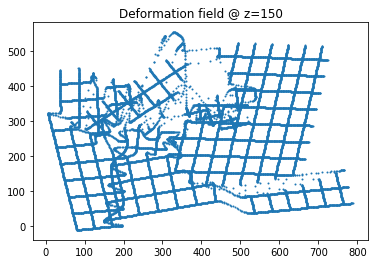

In [159]:
# plt.figure(figsize=(10, 10));
plt.scatter(test_points_warped[:,0], test_points_warped[:,1], s=1)
plt.title('Deformation field @ z=%d' % test_z)
plt.show()

In [164]:
# Verify correctness of the inversion procedure.

q = transform_points_polyrigid([[400, 400, 400]], rigid_parameters.values(), 
                                  anchor_points.values(), 
                                  sigmas.values(), 
                                  weights.values())

qq = transform_points_polyrigid_inverse(q, 
                           rigid_parameters2.values(), 
                                  anchor_points.values(), 
                                  sigmas.values(), 
                                  weights.values())

print qq

[[445 363 361]]


# See the effect of the transform on a regular grid

In [177]:
test_grid_spacing = 50
test_xs = np.arange(0, xdim_f, test_grid_spacing)
test_ys = np.arange(0, ydim_f, test_grid_spacing)
test_zs = np.arange(0, zdim_f, test_grid_spacing)

## See one slice of the 3D grid

In [178]:
def return_gridline_points(xs, ys, z, w, h):
    grid_points = np.array([(x,y,z) for x in range(w) for y in ys] + [(x,y,z) for x in xs for y in range(h)])
    return grid_points

In [179]:
test_z = 150
test_points = return_gridline_points(test_xs, test_ys, test_z, xdim_f, ydim_f)

In [180]:
test_points_warped = transform_points_polyrigid(test_points, 
                                              rigid_parameters.values(), 
                                  anchor_points.values(), 
                                  sigmas.values(), 
                                  weights.values())

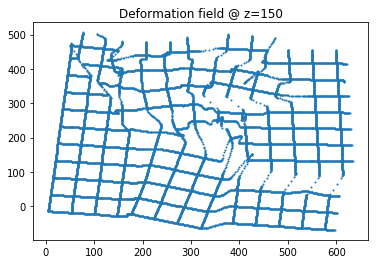

In [181]:
# plt.figure(figsize=(10, 10));
plt.scatter(test_points_warped[:,0], test_points_warped[:,1], s=1)
plt.title('Deformation field @ z=%d' % test_z)
plt.show()

## See 3D grid

In [182]:
grid_mesh_vol = get_grid_mesh_volume(xs=test_xs, ys=test_ys, zs=test_zs, vol_shape=(xdim_f, ydim_f, zdim_f), s=5)

In [197]:
grid_mesh_vol_warped = transform_volume_polyrigid(grid_mesh_vol.astype(np.int), 
                                  rigid_parameters2.values(), 
                                  anchor_points.values(), 
                                  sigmas.values(), 
                                  weights.values(),
                                                 out_bbox=(0, xdim_f-1, 0, ydim_f-1, 0, zdim_f-1))

In [198]:
test_ys_3d, test_xs_3d, test_zs_3d = np.nonzero(grid_mesh_vol)
ys_warped, xs_warped, zs_warped = np.nonzero(grid_mesh_vol_warped)

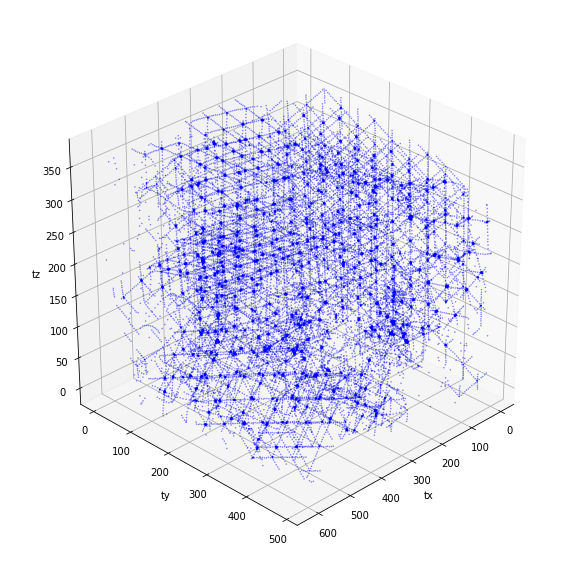

In [199]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(test_xs_3d, test_ys_3d, test_zs_3d, color=(1,0,0), marker='.', s=1, alpha=.5)
ax.scatter(xs_warped, ys_warped, zs_warped, color='b', marker='.', s=1, alpha=.5)
ax.view_init(30, 45)
ax.set_xlabel('tx')
ax.set_ylabel('ty')
ax.set_zlabel('tz')
plt.show()

## Apply transform to volume

In [200]:
for structure, gv in globally_registered_volume.iteritems():
    print structure
    polyrigid_registered_volume = transform_volume_polyrigid(gv, 
                                                          rigid_parameters2.values(), 
                                                          anchor_points.values(), 
                                                          sigmas.values(), 
                                                          weights.values(),
                                                            out_bbox=(0, xdim_f-1, 0, ydim_f-1, 0, zdim_f-1))

    # Save
    fp = \
    DataManager.get_transformed_volume_filepath(stack_m=stack_moving, stack_f=stack_fixed,
                                                prep_id_f=2,
                                                detector_id_f=detector_id,                                                
                                                warp_setting=warp_setting,
                                                structure=structure)

    create_parent_dir_if_not_exists(fp)
    bp.pack_ndarray_file(polyrigid_registered_volume, fp)
    upload_to_s3(fp)

LRt_R
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_LRt_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_LRt_R.bp"
Sp5C_L
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_Sp5C_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_Sp5C_L.bp"
Pn_L
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_score

DC_R
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_DC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_DC_R.bp"
VCA_L
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_VCA_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_VCA_L.bp"
3N_L
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume

LC_R
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_LC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_LC_R.bp"
10N_R
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_10N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume_10N_R.bp"
7n_R
aws s3 cp "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp19_MD658_prep2_detector1_down32_scoreVolume

# Global Transform Reversed

In [4]:
warp_setting = 3
trial_idx = 0

In [6]:
if warp_setting == 1:
    upstream_warp_setting = None
elif warp_setting == 2:
    upstream_warp_setting = 1
elif warp_setting == 3:
    global_warp_setting = 1
    upstream_warp_setting = 2
else:
    raise Exception('Warp setting not recognized.')
    
if trial_idx in [0, 1]:
    upstream_trial_idx = 0

In [7]:
# Load transform parameters

global_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
DataManager.load_alignment_parameters(stack_m=stack_moving, stack_f=stack_fixed,
                                      classifier_setting_m=classifier_setting,
                                      classifier_setting_f=classifier_setting,
                                      warp_setting=global_warp_setting,
                                      trial_idx=trial_idx)

In [ ]:
# for structure in ['PBG_L']:
for structure in all_known_structures_sided:
    
    try:
        
        t = time.time()

        local_transformed_moving_structure_vol = \
            DataManager.load_transformed_volume(stack_m=stack_moving, stack_f=stack_fixed,
                                                classifier_setting_m=classifier_setting,
                                                classifier_setting_f=classifier_setting,
                                                warp_setting=upstream_warp_setting, 
                                                trial_idx=upstream_trial_idx,
                                                structure=structure)

        local_transformed_moving_structure_global_reversed_vol = \
        transform_volume_inverse(vol=local_transformed_moving_structure_vol, 
                                 global_params=global_params, 
                                 centroid_m=centroid_m, centroid_f=centroid_f,
                                 xdim_m=xdim_m, ydim_m=ydim_m, zdim_m=zdim_m)

        local_transformed_moving_structure_global_reversed_fn = \
        DataManager.get_transformed_volume_filepath(stack_m=stack_moving, type_m='score',
                                                        stack_f=stack_fixed, type_f='score',
                                                        downscale=32,
                                                        classifier_setting_m=classifier_setting,
                                                        classifier_setting_f=classifier_setting,
                                                        warp_setting=warp_setting,
                                                        structure=structure)

        create_if_not_exists(os.path.dirname(local_transformed_moving_structure_global_reversed_fn))
        bp.pack_ndarray_file(local_transformed_moving_structure_global_reversed_vol, local_transformed_moving_structure_global_reversed_fn)

        sys.stderr.write('Transform: %.2f seconds.\n' % (time.time() - t))
        
    except Exception as e:
        sys.stderr.write('%s\n' % e)
        sys.stderr.write('Error transforming volume %s.\n' % structure)

# Global Transform Reversed (new)

In [18]:
warp_setting = 18

global_warp_setting = 16
local_warp_setting = 17
trial_idx = None

In [19]:
# Load transform parameters

global_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
DataManager.load_alignment_parameters(stack_m=stack_moving, stack_f=stack_fixed,
                                      prep_id_f=2,
                                      detector_id_f=detector_id,
                                      warp_setting=global_warp_setting)

In [ ]:
for structure in ['PBG_L']:
# for structure in all_known_structures_sided:
    
    try:
        
        t = time.time()

        local_transformed_moving_structure_vol = \
            DataManager.load_transformed_volume(stack_m=stack_moving, stack_f=stack_fixed,
                                                prep_id_f=2,
                                                detector_id_f=detector_id,
                                                warp_setting=local_warp_setting, 
                                                structure=structure)

        local_transformed_moving_structure_global_reversed_vol = \
        transform_volume_inverse(vol=local_transformed_moving_structure_vol, 
                                 global_params=global_params, 
                                 centroid_m=centroid_m, centroid_f=centroid_f,
                                 xdim_m=xdim_m, ydim_m=ydim_m, zdim_m=zdim_m)

        local_transformed_moving_structure_global_reversed_fp = \
        DataManager.get_transformed_volume_filepath(stack_m=stack_moving,
                                                    stack_f=stack_fixed,
                                                    downscale=32,
                                                    prep_id_f=2,
                                                    detector_id_f=detector_id,
                                                    warp_setting=warp_setting,
                                                    structure=structure)

        create_if_not_exists(os.path.dirname(local_transformed_moving_structure_global_reversed_fp))
        bp.pack_ndarray_file(local_transformed_moving_structure_global_reversed_vol, local_transformed_moving_structure_global_reversed_fp)

        sys.stderr.write('Transform: %.2f seconds.\n' % (time.time() - t))
        
    except Exception as e:
        sys.stderr.write('Error transforming volume %s: %s.\n' % (structure, e))

# Globally map specimen to atlas

In [25]:
# Load transform parameters

global_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
DataManager.load_alignment_parameters(stack_m='atlasV4', stack_f='MD662',
                                      prep_id_f=2,
                                      detector_id_f=detector_id,
                                      warp_setting=16)

In [ ]:
# for structure in ['PBG']:
for structure in all_known_structures:
    
    try:
        
        t = time.time()

        vol_f = DataManager.load_original_volume(stack='MD662',
                                                 downscale=32,
                                            prep_id=2,
                                            detector_id=detector_id,
                                            structure=structure)

        vol_f_reversed = transform_volume_inverse(vol=vol_f, 
                                                 global_params=global_params, 
                                                 centroid_m=centroid_m, centroid_f=centroid_f,
                                                 xdim_m=xdim_m, ydim_m=ydim_m, zdim_m=zdim_m)

        vol_f_reversed_fp = \
        DataManager.get_transformed_volume_filepath(stack_m='MD662',
                                                    stack_f='atlasV4',
                                                    prep_id_m=2,
                                                    detector_id_m=detector_id,
                                                    warp_setting=18,
                                                    structure=structure)

        create_if_not_exists(os.path.dirname(vol_f_reversed_fp))
        bp.pack_ndarray_file(vol_f_reversed, vol_f_reversed_fp)
        upload_to_s3(vol_f_reversed_fp)

        sys.stderr.write('Transform: %.2f seconds.\n' % (time.time() - t))
        
    except Exception as e:
        sys.stderr.write('Error transforming volume %s: %s.\n' % (structure, e))